#  pandas Basics <hr style="border:2.5px solid #126782"></hr>

Data Analyst: Gyro A. Madrona<br>
Department: Electrical Engineering

In [54]:
#%pip install pandas --upgrade
#%pip install matplotlib --upgrade

In [55]:
# imports and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# DataFrame

In [56]:
# creating dictionary
data = {
    "Name":['Henry','Owen','Ada'],
    "Age":[22,35,58],
    "Sex":['M','M','F']
}

In [57]:
# creating dataframe from dictionary
df = pd.DataFrame(data)
df

,Name,Age,Sex
0,Henry,22,M
1,Owen,35,M
2,Ada,58,F


## Series

In [58]:
# selecting 'Name' column
df['Name']

0    Henry
1     Owen
2      Ada
Name: Name, dtype: object

In [59]:
# selecting 'Age' column
df['Age']

0    22
1    35
2    58
Name: Age, dtype: int64

In [60]:
# selecting 'Sex' column
df['Sex']

0    M
1    M
2    F
Name: Sex, dtype: object

# Descriptive Statistics

In [61]:
# voltage response dataset
voltage = np.array([
    [12,5,9.1,3.3,24,18.5,15.2,np.nan],
    [2.8,4.5,6,9,11.7,14.8,17.3,20]
])
voltage = voltage.T

In [62]:
# creating DataFrame from numpy array
df = pd.DataFrame(voltage,columns=['Instrument_A','Instrument_B'])
df

,Instrument_A,Instrument_B
0,12.0,2.8
1,5.0,4.5
2,9.1,6.0
3,3.3,9.0
4,24.0,11.7
5,18.5,14.8
6,15.2,17.3
7,NaN,20.0


In [63]:
# summary of statistics
df.describe()

,Instrument_A,Instrument_B
count,7.000000,8.000000
mean,12.442857,10.762500
std,7.396138,6.252528
min,3.300000,2.800000
25%,7.050000,5.625000
50%,12.000000,10.350000
75%,16.850000,15.425000
max,24.000000,20.000000


## Bar Chart

In [64]:
# mean of instrument A
a_mean = df['Instrument_A'].mean()
a_mean

np.float64(12.442857142857141)

In [65]:
# Mean of instrument B
b_mean = df['Instrument_B'].mean()
b_mean

np.float64(10.7625)

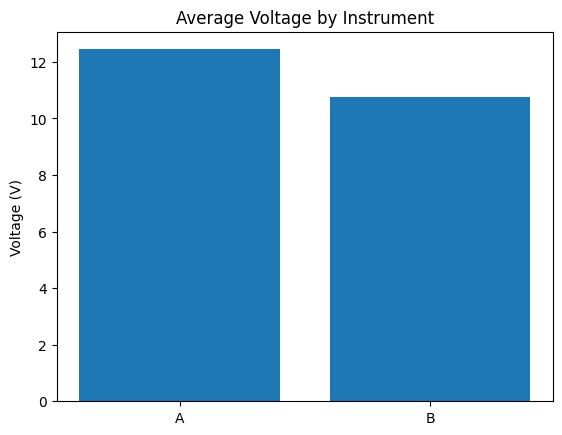

In [66]:
# bar chart
plt.figure()
plt.bar(['A','B'],[a_mean,b_mean])
plt.title('Average Voltage by Instrument')
plt.ylabel('Voltage (V)')
plt.show()

# csv to DataFrame

In [67]:
# creating dataframe from csv file
df = pd.read_csv(r"raw\resistance-test-stack.csv",
                 delimiter=",",
                 index_col='Test No.')
df

,Machine,Resistance
Test No.,,
1,Jaguar,10.6
2,Jaguar,9.1
3,Jaguar,9.3
4,Jaguar,9.8
5,Jaguar,10.5
6,Jaguar,10.4
7,Jaguar,9.5
8,Jaguar,11.0
9,Jaguar,10.4


In [68]:
# top 5 rows
df.head()

,Machine,Resistance
Test No.,,
1,Jaguar,10.6
2,Jaguar,9.1
3,Jaguar,9.3
4,Jaguar,9.8
5,Jaguar,10.5


In [69]:
# last 5 rows
df.tail()

,Machine,Resistance
Test No.,,
17,Panther,10.8
18,Panther,9.9
19,Panther,9.2
20,Panther,9.1
21,Panther,9.1


In [70]:
# summary dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 1 to 21
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Machine     21 non-null     object 
 1   Resistance  21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 504.0+ bytes


In [71]:
# summary of statistics
df.describe()

,Resistance
count,21.000000
mean,10.042857
std,2.809728
min,3.000000
25%,9.200000
50%,9.800000
75%,10.500000
max,20.000000


In [72]:
# filtering dataframe where machine is jaguar
jag = df[df['Machine'] == 'Jaguar']
jag

,Machine,Resistance
Test No.,,
1,Jaguar,10.6
2,Jaguar,9.1
3,Jaguar,9.3
4,Jaguar,9.8
5,Jaguar,10.5
6,Jaguar,10.4
7,Jaguar,9.5
8,Jaguar,11.0
9,Jaguar,10.4


In [73]:
# mean of Jaguar machine
jag_mean = jag['Resistance'].mean()
jag_mean

np.float64(9.399999999999999)

In [74]:
# filtering DataFrame where machine is panther
pan = df[df['Machine']=='Panther']
pan

,Machine,Resistance
Test No.,,
12,Panther,10.1
13,Panther,11.0
14,Panther,9.1
15,Panther,20.0
16,Panther,9.2
17,Panther,10.8
18,Panther,9.9
19,Panther,9.2
20,Panther,9.1


In [75]:
# mean of Panther machine
pan_mean = pan['Resistance'].mean()
pan_mean

np.float64(10.75)

## Bar Chart

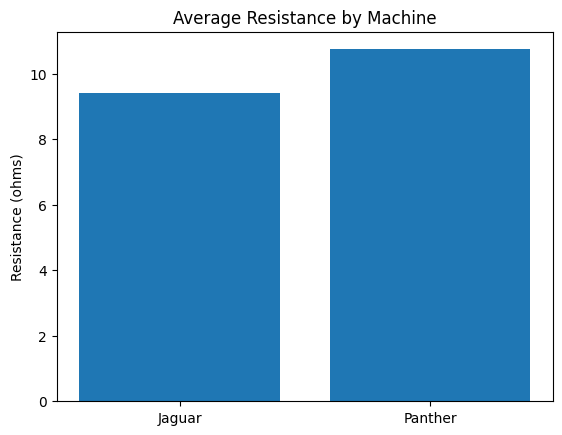

In [76]:
# bar chart
plt.figure()
plt.bar(['Jaguar','Panther'],[jag_mean,pan_mean])
plt.title('Average Resistance by Machine')
plt.ylabel('Resistance (ohms)')
plt.show()


In [77]:
# using group by
df = df.groupby('Machine')['Resistance'].mean().reset_index()
df

,Machine,Resistance
0,Jaguar,9.40
1,Panther,10.75


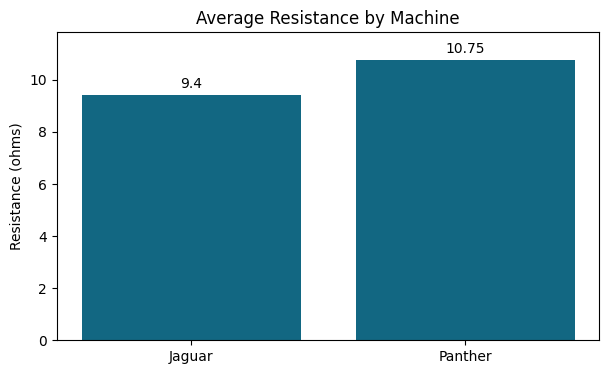

In [86]:
# bar chart
plt.figure(figsize=(7,4))
bars = plt.bar(df['Machine'],df['Resistance'],
               color='#126782')
plt.title('Average Resistance by Machine')
plt.ylabel('Resistance (ohms)')

# bar labels
plt.bar_label(bars,padding=3)
plt.margins(y=0.1)
plt.show()
